In [4]:
from tensorflow.keras.models import load_model
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, PReLU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from datetime import datetime
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [10]:
# Cargar el modelo guardado
loaded_model = load_model(r'C:\Users\lina-\Documents\ProyectoComputacion\Proyecto\Codigos\fsrcnn_model_v2.h5', compile=False)

# Compilar el modelo cargado
loaded_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


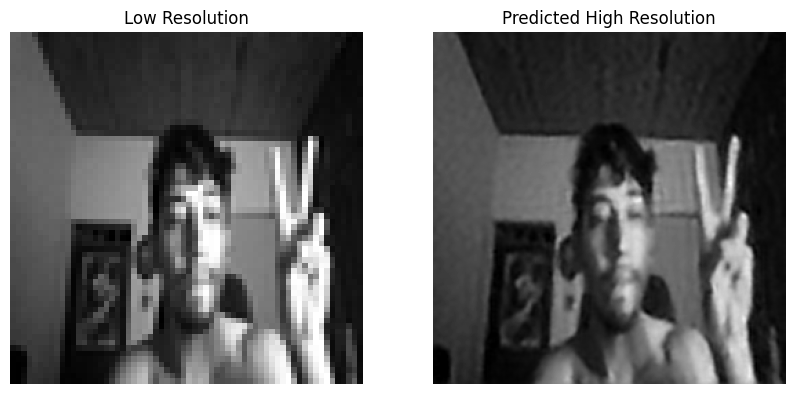

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Función para cargar y preprocesar la imagen
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convertir a escala de grises
    low_res_image = image.resize((64, 64), Image.Resampling.LANCZOS)  # Redimensionar a 64x64
    input_array = np.array(low_res_image) / 255.0  # Normalizar
    input_array = input_array.reshape(1, 64, 64, 1)  # Ajustar forma para el modelo
    return input_array, low_res_image

# Función para postprocesar y mostrar la imagen
def show_image(input_image, predicted_image):
    predicted_image = predicted_image.reshape(256, 256)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Low Resolution')
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Predicted High Resolution')
    plt.imshow(predicted_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Ruta a la nueva imagen
new_image_path = r"C:\Users\lina-\Pictures\Camera Roll\WIN_20240605_02_46_44_Pro.jpg"

# Preprocesar la nueva imagen
input_array, low_res_image = preprocess_image(new_image_path)

# Hacer predicción con el modelo cargado
predicted_array = loaded_model.predict(input_array)

# Mostrar la imagen de baja resolución y la predicción de alta resolución
show_image(low_res_image, predicted_array[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Low resolution image saved to: C:\Users\lina-\Documents\ProyectoComputacion\Proyecto\Implementaciones\low_res_image.png
High resolution image saved to: C:\Users\lina-\Documents\ProyectoComputacion\Proyecto\Implementaciones\high_res_image.png


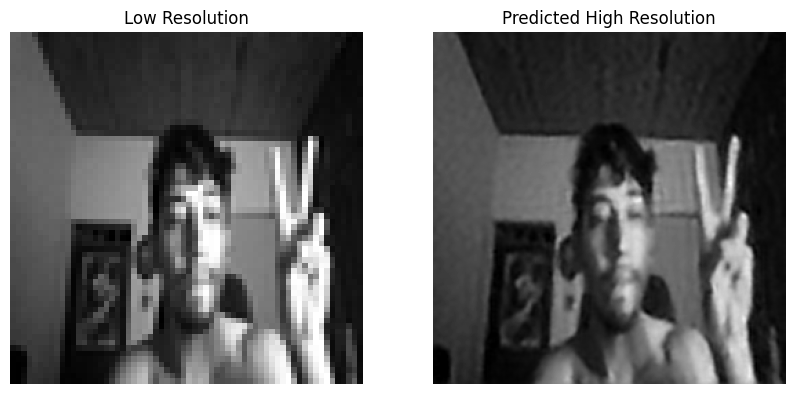

In [12]:
# Función para cargar y preprocesar la imagen
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convertir a escala de grises
    low_res_image = image.resize((64, 64), Image.Resampling.LANCZOS)  # Redimensionar a 64x64
    input_array = np.array(low_res_image) / 255.0  # Normalizar
    input_array = input_array.reshape(1, 64, 64, 1)  # Ajustar forma para el modelo
    return input_array, low_res_image

# Función para guardar las imágenes
def save_images(input_image, predicted_image, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    low_res_path = os.path.join(folder_path, 'low_res_image.png')
    high_res_path = os.path.join(folder_path, 'high_res_image.png')

    input_image.save(low_res_path)
    predicted_image = Image.fromarray((predicted_image * 255).astype(np.uint8))
    predicted_image.save(high_res_path)

    print(f"Low resolution image saved to: {low_res_path}")
    print(f"High resolution image saved to: {high_res_path}")

# Ruta a la nueva imagen
new_image_path = r"C:\Users\lina-\Pictures\Camera Roll\WIN_20240605_02_46_44_Pro.jpg"

# Carpeta donde se guardarán las imágenes
output_folder = r"C:\Users\lina-\Documents\ProyectoComputacion\Proyecto\Implementaciones"

# Preprocesar la nueva imagen
input_array, low_res_image = preprocess_image(new_image_path)

# Hacer predicción con el modelo cargado
predicted_array = loaded_model.predict(input_array)

# Guardar las imágenes de baja resolución y la predicción de alta resolución
save_images(low_res_image, predicted_array[0].reshape(256, 256), output_folder)

# Mostrar las imágenes
def show_image(input_image, predicted_image):
    predicted_image = predicted_image.reshape(256, 256)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Low Resolution')
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Predicted High Resolution')
    plt.imshow(predicted_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Mostrar la imagen de baja resolución y la predicción de alta resolución
show_image(low_res_image, predicted_array[0])